In [ ]:
# import the necessary packages
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
# import machine learning packagae
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [5]:
# mount your google drive
from google.colab import drive
drive.mount('./content')

Mounted at ./content


In [ ]:
# import the library for data augmentation
IMAGE_HEIGHT,IMAGE_WIDTH,IMAGE_CHANNELS = 66,100,3
INPUT_SHAPE = (IMAGE_HEIGHT,IMAGE_WIDTH,IMAGE_CHANNELS)
print(INPUT_SHAPE)

(66, 100, 3)


In [ ]:
! rm -rf train_data

In [ ]:
# unzip the train_data
!unzip /content/content/MyDrive/train_data.zip -d /content/content/MyDrive/train_data

Archive:  /content/content/MyDrive/train_data.zip
replace /content/content/MyDrive/train_data/driving_log.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### 1/ Data augmentation

In [ ]:
# mount your google drive
from google.colab import drive
drive.mount('./content')

In [1]:
# import the libraries for data augmentation
# import the necessary packages
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# import machine learning packagae
import tensorflow as tf
from sklearn.model_selection import train_test_split
import cv2,os

In [2]:
# import the library for data augmentation
IMAGE_HEIGHT,IMAGE_WIDTH,IMAGE_CHANNELS = 66,100,3
INPUT_SHAPE = (IMAGE_HEIGHT,IMAGE_WIDTH,IMAGE_CHANNELS)
print(INPUT_SHAPE)

(66, 100, 3)


In [3]:
def load_image(data_dir,image_file):
  '''
  load RGB image from directory
  Arguments:
  data_dir --- the directory of dataset
  image_file --- the name of image
  Return:
  img --- the image in numpy array
  '''
  return mpimg.imread(os.path.join(data_dir,image_file.strip()))

(160, 320, 3)


Text(0.5, 1.0, 'loaded image')

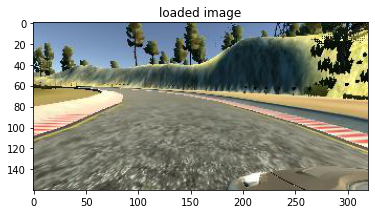

In [4]:
img = load_image(data_dir = '/content/content/MyDrive/train_data/IMG/', image_file = 'left_2022_03_06_17_12_32_855.jpg')
print(img.shape)
plt.imshow(img)
plt.title('loaded image')

In [5]:
def crop(image):
  '''
  crop the sky horizon line and car head in the image
  Arguments:
  image --- the original image
  Return:
  The cropped image
  '''
  return image[60:-25,:,:]

Text(0.5, 1.0, 'image cropped')

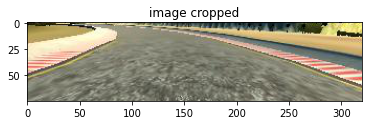

In [6]:
plt.imshow(crop(img)) 
plt.title('image cropped')

In [7]:
def resize(image):
  '''
  resize the image
  Arguments:
  image --- the original image
  Return:
  the resized image
  '''
  return cv2.resize(image,(IMAGE_WIDTH,IMAGE_HEIGHT),cv2.INTER_AREA)

Text(0.5, 1.0, 'resized image')

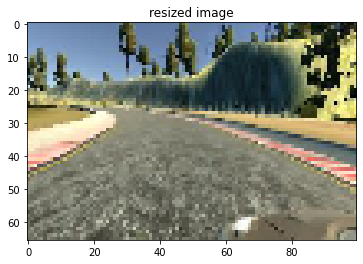

In [8]:
plt.imshow(resize(img)) 
plt.title("resized image")

In [9]:
def rgb2yuv(image):
  '''
  Pre-process image
  # Arguments:
  image --- the original image
  Return:
  the image after change the color zone
  '''
  return cv2.cvtColor(image,cv2.COLOR_RGB2YUV) 

Text(0.5, 1.0, 'yuv image')

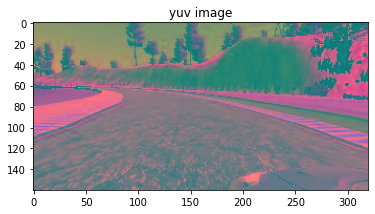

In [10]:
plt.imshow(rgb2yuv(img))
plt.title('yuv image')

In [11]:
def preprocess(image):
  '''
  Pre-process image, crop, resize and change rgb to yuv
  Arguments:
  image --- the original image
  Return:
  The preprocessed image
  '''
  img = crop(image) 
  img = resize(img)
  img = rgb2yuv(img) 
  return img

Text(0.5, 1.0, 'preprocessed')

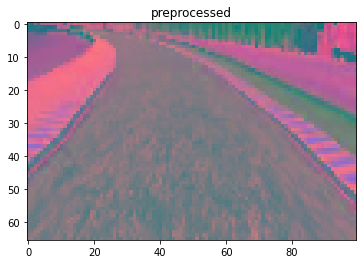

In [12]:
plt.imshow(preprocess(img))
plt.title('preprocessed')

In [13]:
def choose_image(data_dir,center,left,right,steering_angle):
  '''
  Choose the random image left or right
  Arguments:
  data_dir --- the dataset directory
  center --- the center image name
  left --- the left image name
  right --- the right image name
  steering_angle ---the steerin angle
  Return:
  the preprogressed random choice image
  '''
  choice = np.random.choice(3)
  # if the value choiced is 0 then add  0.2 to the steering
  if choice == 0:
    return load_image(data_dir,left), steering_angle + 0.2 
  elif choice == 1:
    return load_image(data_dir,right), steering_angle - 0.2  # else substract 0.2 to the steering angle
  # else:
  return load_image(data_dir,center),steering_angle

Text(0.5, 1.0, 'check load image')

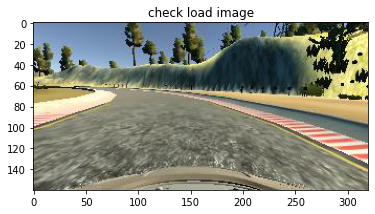

In [14]:
img = load_image('/content/content/MyDrive/train_data/IMG/','center_2022_03_06_17_12_33_318.jpg')

plt.imshow(img)
plt.title('check load image')

steering angle -0.1


Text(0.5, 1.0, 'the choose_random image')

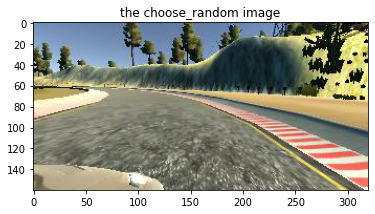

In [15]:
img,steering_angle = choose_image(data_dir = '/content/content/MyDrive/train_data/IMG/',
                        center = 'center_2022_03_06_17_12_33_318.jpg',
                        left = 'left_2022_03_06_17_12_33_318.jpg',
                        right = 'right_2022_03_06_17_12_33_318.jpg',
                        steering_angle = 0.1     
                        )
print(f'steering angle {steering_angle}')
plt.imshow(img)
plt.title('the choose_random image')

In [16]:
def random_flip(image,steering_angle):
  '''
  random flip the image
  Arguments:
  image --- the original image
  streering_angle --- the streering angle
  Return:
  the random flip number
  '''
  if np.random.rand() < 0.5:
    image  = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image,steering_angle
  return  image,steering_angle

Text(0.5, 1.0, 'flip the image')

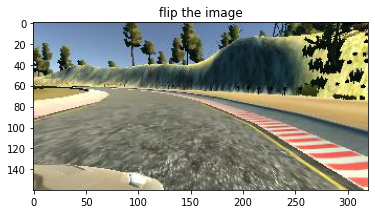

In [17]:
image,steering_angle = random_flip(img,steering_angle)
plt.imshow(image)
plt.title('flip the image')

In [18]:
def random_translate(image,steering_angle, range_x,range_y):
  '''
  random move the image with range_x,range_y,
  Arguments:
  image --- the original image
  steering_angle --- the steering angle
  range_x --- the distance moving in x axis
  range_y --- the distance moving in y axis
  Return:
  The random translated image
  '''
  trans_x = range_x * (np.random.rand() - 0.5)
  trans_y = range_y * (np.random.rand() - 0.5)
  steering_angle += trans_x * 0.002 
  trans_m  =np.float32([[1,0,trans_x],[0,1,trans_y]])
  height,width = image.shape[:2]
  image = cv2.warpAffine(image,trans_m,(width,height))
  return image,steering_angle

In [19]:
range_x  = 10
range_y = 10
trans_x = range_x * (np.random.rand() - 0.5)
trans_y = range_y * (np.random.rand() -0.5)
print(f'trans_x {trans_x}')
print(f'trans_y {trans_y}')

trans_x -1.2923889543866485
trans_y 0.4052029176495986


In [20]:
  np.float32([[1, 0, trans_x], [0, 1, trans_y]])

array([[ 1.        ,  0.        , -1.2923889 ],
       [ 0.        ,  1.        ,  0.40520293]], dtype=float32)

Text(0.5, 1.0, 'the translate image')

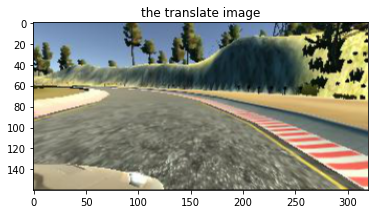

In [21]:
image,steering_angle = random_translate(img,steering_angle = 0.1,range_x = 1,range_y = 1)
plt.imshow(image)
plt.title('the translate image')

In [22]:
def random_shadow(image):
  '''
  Create a random shadow into the image
  Arguments:
  image --- the original image
  Return:
  The image added the shadow
  '''
  # calculate (x1,y1) and (x2,y2) for drawing line
  # xm,ym gives all the locations of images
  x1,y1 = IMAGE_WIDTH * np.random.rand(),0
  x2,y2 = IMAGE_WIDTH * np.random.rand(),IMAGE_HEIGHT
  xm,ym = np.mgrid[0:image.shape[0],0:image.shape[1]] 
  # mathematically speaking, we want to set 1 below the line and zero otherwise
  # Our coordinate is up side down, So, the above the line:
  # (ym-y1)/(xm-1) - (y2-y1)/(x2-x1)
  # as x2 == x1, causes zero division problem, we will write it in the below form:
  # (ym-y1)*(x2-x1) - (y2-y1)*(xm-x1) > 0
  mask = np.zeros_like(image[:,:,1])
  mask[(ym - y1)*(x2 -x1) - (y2 - y1)*(xm - x1)>0] = 1
  # choose which side should have shadow and adjust saturation
  cond = mask == np.random.randint(2)
  s_ratio = np.random.uniform(low = 0.2, high = 0.5)
  # adjust Saturation in HLS (Hue,Light,Saturation)
  hls = cv2.cvtColor(image,cv2.COLOR_RGB2HLS)
  hls[:,:,1][cond] = hls[:,:,1][cond] * s_ratio
  return cv2.cvtColor(hls,cv2.COLOR_HLS2RGB)

Text(0.5, 1.0, 'image the shadow')

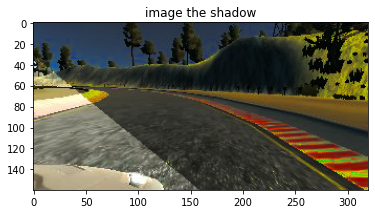

In [23]:
plt.imshow(random_shadow(img))
plt.title('image the shadow')

In [24]:
def random_brightness(image):
  '''
  Add the brightness for image
  Arguments:
  image --- the original image
  Return:
  the brightness image
  '''
  # HSV (hue,saturation,value) is also called HSB ('B' Brightness)
  hsv = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
  ratio = 1.0 + 0.4 * (np.random.rand()-0.5)
  hsv[:,:,2] = hsv[:,:,2] * ratio 
  return cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)

Text(0.5, 1.0, 'brightness image')

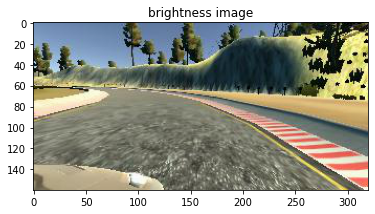

In [25]:
plt.imshow(random_brightness(img))
plt.title('brightness image')

In [26]:
def augument(data_dir,center,left,right,steering_angle,range_x = 100, range_y = 100):
  '''
  Combine all augmented methods: Choose_random -> flips -> translate -> shadow -> brightness
  Arguments:
  data_dir --- the directory to dataset floder
  center --- image of center camera
  left --- image of left camera
  right --- image of right camera
  steering_angle  --- the steering angle of car
  range_x --- the distance move image follow x axis
  range_y --- the distance move image follow y axis
  Return:
  the augmented image
  '''
  image,steering_angle = choose_image(data_dir,center,left,right,steering_angle)
  image,steering_angle = random_flip(image,steering_angle) 
  image,steering_angle = random_translate(image,steering_angle,range_x,range_y) 
  image = random_shadow(image) 
  image = random_brightness(image) 
  return image,steering_angle    

Text(0.5, 1.0, 'augumented image')

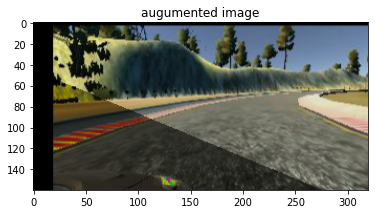

In [27]:
img,steering_angle = augument(data_dir = '/content/content/MyDrive/train_data/IMG/',
                        center = 'center_2022_03_06_17_12_33_318.jpg',
                        left = 'left_2022_03_06_17_12_33_318.jpg',
                        right = 'right_2022_03_06_17_12_33_318.jpg',
                        steering_angle = 0.1 )
plt.imshow(img)
plt.title('augumented image')

In [28]:
def batch_generator(data_dir,image_paths,steering_angles,batch_size,is_training):
  '''
  Return image for model fitting
  Arguments:
  data_dir --- the directory to dataset
  image_paths --- the path of specify image
  steering_angles --- the steering_angles of that image
  batch_size --- the size of batch, default is 32,
  is_training --- the boolean check training
  Return:
  images, steers 
  '''
  images = np.empty([batch_size,IMAGE_HEIGHT,IMAGE_WIDTH,IMAGE_CHANNELS])
  steers = np.empty(batch_size)
  while True:
    i = 0
    for index in np.random.permutation(image_paths.shape[0]):
      center,left,right = image_paths[index]
      streering_angle = steering_angles[index] 
      # argumentation
      if is_training and np.random.rand() < 0.5:
        image,steering_angles = augument(data_dir,center,left,right,steering_angle)
      else:
        image = load_image(data_dir,center)
      # add the image steering angle to the batch 
      images[i] = preprocess(image)
      steers[i] = steering_angle
      i += 1
      if i == batch_size:
        break
      yield images,steers

In [29]:
import pandas as pd 
import numpy as np 
import os  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
#from keras.regularizers import l2

In [30]:
data_dir ='/content/content/MyDrive/train_data'

# Read the dataframe 
df = pd.read_csv('/content/content/MyDrive/train_data/driving_log.csv', names = ['center','left','right','steering','throttle','reverse','spped'])


In [31]:
df1 = df.copy()

In [32]:
df1.head()

,center,left,right,steering,throttle,reverse,spped
0,D:\ML\beta_simulator_windows\train_data\IMG\ce...,D:\ML\beta_simulator_windows\train_data\IMG\le...,D:\ML\beta_simulator_windows\train_data\IMG\ri...,0.0,0.0,0,0.000008
1,D:\ML\beta_simulator_windows\train_data\IMG\ce...,D:\ML\beta_simulator_windows\train_data\IMG\le...,D:\ML\beta_simulator_windows\train_data\IMG\ri...,0.0,0.0,0,0.000009
2,D:\ML\beta_simulator_windows\train_data\IMG\ce...,D:\ML\beta_simulator_windows\train_data\IMG\le...,D:\ML\beta_simulator_windows\train_data\IMG\ri...,0.0,0.0,0,0.000010
3,D:\ML\beta_simulator_windows\train_data\IMG\ce...,D:\ML\beta_simulator_windows\train_data\IMG\le...,D:\ML\beta_simulator_windows\train_data\IMG\ri...,0.0,0.0,0,0.000012
4,D:\ML\beta_simulator_windows\train_data\IMG\ce...,D:\ML\beta_simulator_windows\train_data\IMG\le...,D:\ML\beta_simulator_windows\train_data\IMG\ri...,0.0,0.0,0,0.000013


In [33]:
new_center = df1['center'].apply(lambda x: x.split('\\')[-1])
new_center = '/content/content/MyDrive/train_data/IMG/' + new_center
new_center

0       /content/content/MyDrive/train_data/IMG/center...
1       /content/content/MyDrive/train_data/IMG/center...
2       /content/content/MyDrive/train_data/IMG/center...
3       /content/content/MyDrive/train_data/IMG/center...
4       /content/content/MyDrive/train_data/IMG/center...
                              ...                        
3293    /content/content/MyDrive/train_data/IMG/center...
3294    /content/content/MyDrive/train_data/IMG/center...
3295    /content/content/MyDrive/train_data/IMG/center...
3296    /content/content/MyDrive/train_data/IMG/center...
3297    /content/content/MyDrive/train_data/IMG/center...
Name: center, Length: 3298, dtype: object

In [34]:
new_center[0]

'/content/content/MyDrive/train_data/IMG/center_2022_03_06_17_12_32_776.jpg'

In [35]:
new_left = df1['left'].apply(lambda x: x.split('\\')[-1])
new_left = '/content/content/MyDrive/train_data/IMG/' + new_left
new_left

0       /content/content/MyDrive/train_data/IMG/left_2...
1       /content/content/MyDrive/train_data/IMG/left_2...
2       /content/content/MyDrive/train_data/IMG/left_2...
3       /content/content/MyDrive/train_data/IMG/left_2...
4       /content/content/MyDrive/train_data/IMG/left_2...
                              ...                        
3293    /content/content/MyDrive/train_data/IMG/left_2...
3294    /content/content/MyDrive/train_data/IMG/left_2...
3295    /content/content/MyDrive/train_data/IMG/left_2...
3296    /content/content/MyDrive/train_data/IMG/left_2...
3297    /content/content/MyDrive/train_data/IMG/left_2...
Name: left, Length: 3298, dtype: object

In [36]:
new_right = df1['right'].apply(lambda x: x.split('\\')[-1])
new_right = '/content/content/MyDrive/train_data/IMG/' + new_right
new_right

0       /content/content/MyDrive/train_data/IMG/right_...
1       /content/content/MyDrive/train_data/IMG/right_...
2       /content/content/MyDrive/train_data/IMG/right_...
3       /content/content/MyDrive/train_data/IMG/right_...
4       /content/content/MyDrive/train_data/IMG/right_...
                              ...                        
3293    /content/content/MyDrive/train_data/IMG/right_...
3294    /content/content/MyDrive/train_data/IMG/right_...
3295    /content/content/MyDrive/train_data/IMG/right_...
3296    /content/content/MyDrive/train_data/IMG/right_...
3297    /content/content/MyDrive/train_data/IMG/right_...
Name: right, Length: 3298, dtype: object

In [37]:
df['new_center'] = new_center
df['new_left'] = new_left
df['new_right'] = new_right

In [38]:
df.head()

,center,left,right,steering,throttle,reverse,spped,new_center,new_left,new_right
0,D:\ML\beta_simulator_windows\train_data\IMG\ce...,D:\ML\beta_simulator_windows\train_data\IMG\le...,D:\ML\beta_simulator_windows\train_data\IMG\ri...,0.0,0.0,0,0.000008,/content/content/MyDrive/train_data/IMG/center...,/content/content/MyDrive/train_data/IMG/left_2...,/content/content/MyDrive/train_data/IMG/right_...
1,D:\ML\beta_simulator_windows\train_data\IMG\ce...,D:\ML\beta_simulator_windows\train_data\IMG\le...,D:\ML\beta_simulator_windows\train_data\IMG\ri...,0.0,0.0,0,0.000009,/content/content/MyDrive/train_data/IMG/center...,/content/content/MyDrive/train_data/IMG/left_2...,/content/content/MyDrive/train_data/IMG/right_...
2,D:\ML\beta_simulator_windows\train_data\IMG\ce...,D:\ML\beta_simulator_windows\train_data\IMG\le...,D:\ML\beta_simulator_windows\train_data\IMG\ri...,0.0,0.0,0,0.000010,/content/content/MyDrive/train_data/IMG/center...,/content/content/MyDrive/train_data/IMG/left_2...,/content/content/MyDrive/train_data/IMG/right_...
3,D:\ML\beta_simulator_windows\train_data\IMG\ce...,D:\ML\beta_simulator_windows\train_data\IMG\le...,D:\ML\beta_simulator_windows\train_data\IMG\ri...,0.0,0.0,0,0.000012,/content/content/MyDrive/train_data/IMG/center...,/content/content/MyDrive/train_data/IMG/left_2...,/content/content/MyDrive/train_data/IMG/right_...
4,D:\ML\beta_simulator_windows\train_data\IMG\ce...,D:\ML\beta_simulator_windows\train_data\IMG\le...,D:\ML\beta_simulator_windows\train_data\IMG\ri...,0.0,0.0,0,0.000013,/content/content/MyDrive/train_data/IMG/center...,/content/content/MyDrive/train_data/IMG/left_2...,/content/content/MyDrive/train_data/IMG/right_...


(array([  55.,   53.,   85.,  143.,   87., 2805.,   21.,   14.,   12.,
          23.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

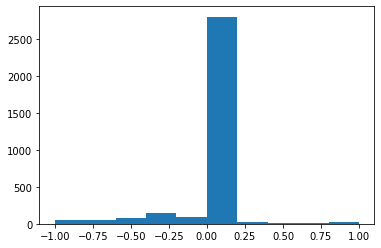

In [39]:
# Take the path to center,left,right
X = df[['new_center','new_left','new_right']].values
y = df['steering'].values 

plt.hist(y)

If we have so many input with steering angle is zero, we will remove this input to avoid the zero prediction train

In [40]:
# Split train test dataset
X_train,X_valid,y_train,y_valid = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [41]:
print(f'X_train.shape {X_train.shape}')
print(f'X_valid.shape {X_valid.shape}')
print(f'y_train.shape {y_train.shape}')
print(f'y_valid.shape {y_valid.shape}')

X_train.shape (2638, 3)
X_valid.shape (660, 3)
y_train.shape (2638,)
y_valid.shape (660,)


In [42]:
# Build model
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(24,5,5,activation = 'elu'),
                             tf.keras.layers.Conv2D(36,5,5,activation = 'elu'),
                             tf.keras.layers.Conv2D(48,5,5,activation = 'elu'),
                             tf.keras.layers.Conv2D(64,3,3,activation = 'elu'),
                             tf.keras.layers.Conv2D(64,3,3,activation = 'elu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(100,activation = 'elu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(50,activation = 'elu'),
                             tf.keras.layers.Dense(10,activation = 'elu'),
                             tf.keras.layers.Dense(4)
                          ])

In [43]:
# the hyperparamter
nb_epoch = 10
samples_per_epoch = 1000
batch_size = 32
save_best_only = True 
learning_rate = 1e-4 

# checkpoint make model storage the lowest validation loss
checkpoint = tf.keras.callbacks.ModelCheckpoint('models/model-{epoch:03d}.h5',
                             monitor = 'val_loss',
                             verbose = 0,
                             save_best_only = save_best_only,
                             mode = 'auto'
                             )

In [44]:
# Compile the model with mean_square_error
model.compile(loss = 'mean_squared_error',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4))

In [ ]:
# Fit the model 
model.fit(batch_generator(data_dir,X_train,y_train,batch_size,True),
                    steps_per_epoch= samples_per_epoch,
                    epochs = nb_epoch,
                    validation_data = batch_generator(data_dir,X_valid,y_valid,batch_size, False),
                    callbacks = [checkpoint],
)

Epoch 1/10
